In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "2"
import json
import torch
import pandas as pd
from PIL import Image
from tqdm.auto import tqdm
from point_e.util.point_cloud import PointCloud
from point_e.models.download import load_checkpoint
from point_e.util.plotting import render_point_cloud
from point_e.diffusion.sampler import PointCloudSampler
from point_e.models.configs import MODEL_CONFIGS, model_from_config
from point_e.diffusion.configs import DIFFUSION_CONFIGS, diffusion_from_config

In [2]:
shapetalk_csv = "/scratch/noam/control_point_e/datasets/chair/train.csv"
shapenet_uid_to_partnet_uid_path = "/scratch/noam/partnet/shapenet_uid_to_partnet_uid.json"

In [3]:
with open(shapenet_uid_to_partnet_uid_path, "r") as f:
    shapenet_uid_to_partnet_uid = json.load(f)

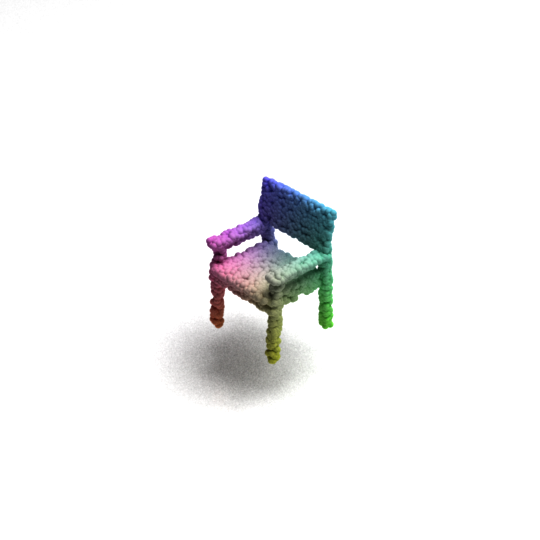

In [4]:
shapenet_uid = "chair/ShapeNet/11d9817e65d7ead6b87028a4b477349f"
pc = PointCloud.load_partnet(shapenet_uid_to_partnet_uid[shapenet_uid], shapenet_uid)
pc = pc.random_sample(4096 - 1024)
Image.fromarray(render_point_cloud(pc))

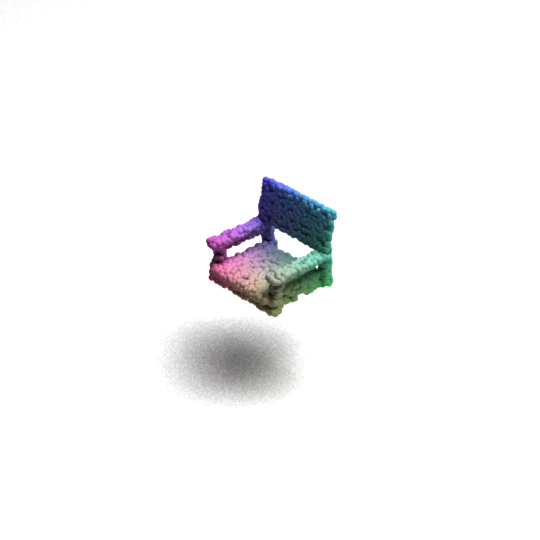

In [5]:
masked_pc = pc.remove("leg")
Image.fromarray(render_point_cloud(masked_pc))

In [4]:
df = pd.read_csv(shapetalk_csv)
df = df[df.source_uid.apply(lambda uid: uid in shapenet_uid_to_partnet_uid)]

/tmp/ipykernel_268370/1653943801.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(shapetalk_csv)


In [7]:
sample = df[df.llama3_utterance == "a chair with long legs"].iloc[2]
shapenet_uid = sample.source_uid
sample.utterance

'The target has taller legs'

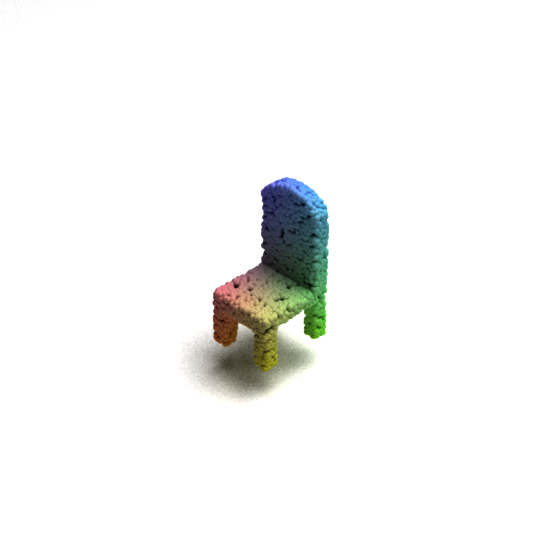

In [8]:
pc = PointCloud.load_partnet(shapenet_uid_to_partnet_uid[shapenet_uid], shapenet_uid)
pc = pc.random_sample(4096 - 1024)
Image.fromarray(render_point_cloud(pc))

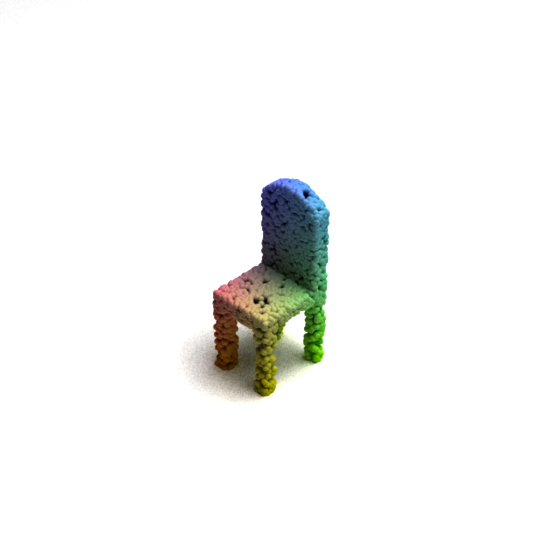

In [9]:
new_pc = pc.expand("leg", [2], 4, clip_max=True)
Image.fromarray(render_point_cloud(new_pc))

In [10]:
sample = df[df.llama3_utterance == "a chair with a long backrest"].iloc[1]
shapenet_uid = sample.source_uid
sample.utterance

'The chair has a taller back'

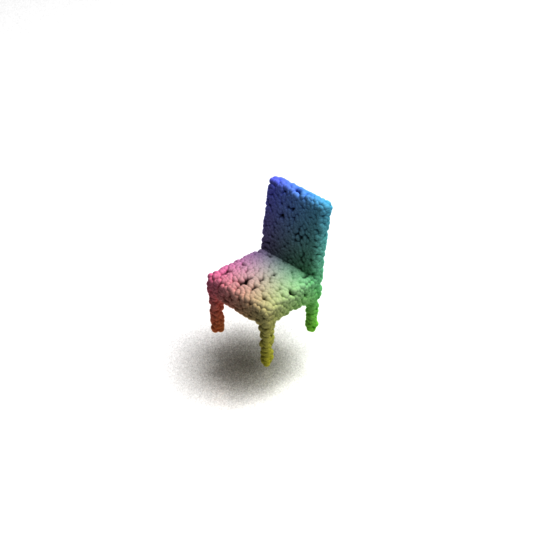

In [11]:
pc = PointCloud.load_partnet(shapenet_uid_to_partnet_uid[shapenet_uid], shapenet_uid)
pc = pc.random_sample(4096 - 1024)
Image.fromarray(render_point_cloud(pc))

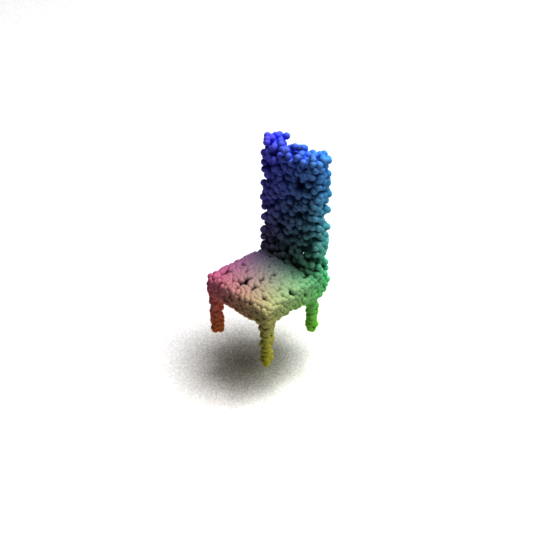

In [12]:
new_pc = pc.expand("back", [2], 3, clip_min=True)
Image.fromarray(render_point_cloud(new_pc))

In [13]:
sample = df[df.llama3_utterance == "a chair with thin legs"].iloc[5]
shapenet_uid = sample.source_uid
sample.utterance

'It has thinner legs'

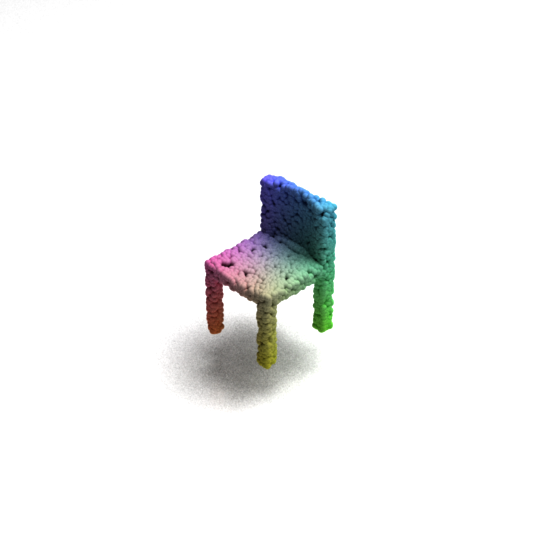

In [14]:
pc = PointCloud.load_partnet(shapenet_uid_to_partnet_uid[shapenet_uid], shapenet_uid)
pc = pc.random_sample(4096 - 1024)
Image.fromarray(render_point_cloud(pc))

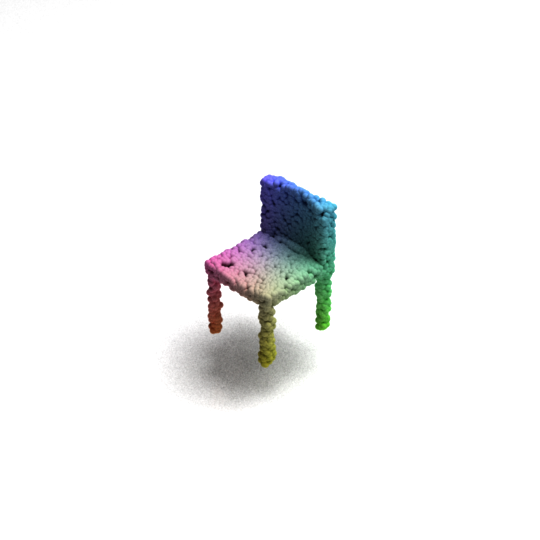

In [15]:
new_pc = pc.shrink("leg", [0, 1])
Image.fromarray(render_point_cloud(new_pc))

In [16]:
sample = df[df.llama3_utterance == "a chair with thick legs"].iloc[5]
shapenet_uid = sample.source_uid
sample.utterance

'The legs are thicker'

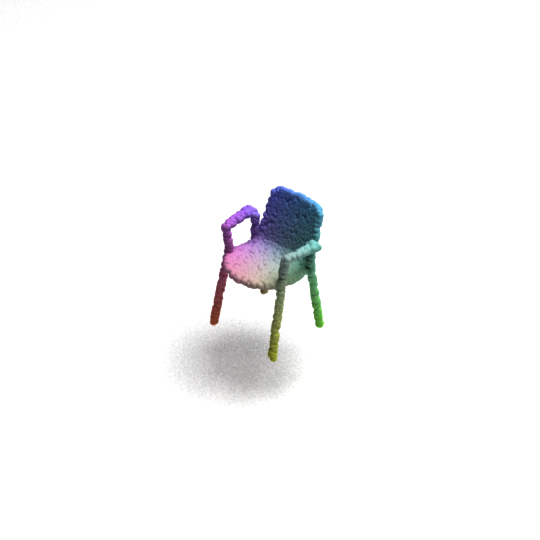

In [17]:
pc = PointCloud.load_partnet(shapenet_uid_to_partnet_uid[shapenet_uid], shapenet_uid)
pc = pc.random_sample(4096 - 1024)
Image.fromarray(render_point_cloud(pc))

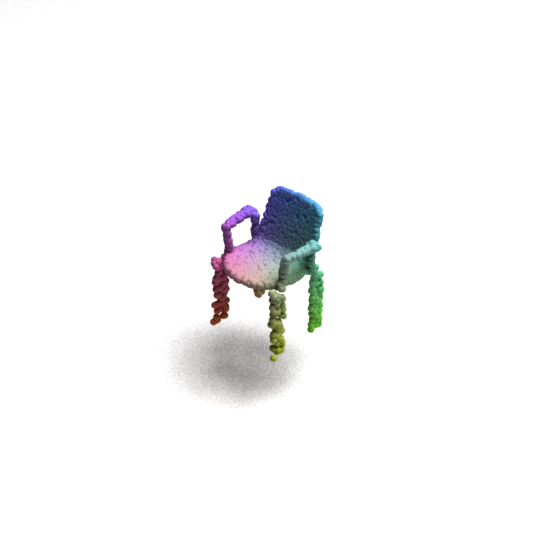

In [18]:
new_pc = pc.expand("leg", [0, 1], 2)
Image.fromarray(render_point_cloud(new_pc))

In [19]:
sample = df[df.llama3_utterance == "a chair with a thin seat"].iloc[0]
shapenet_uid = sample.source_uid
sample.utterance

'Its seat is thinner'

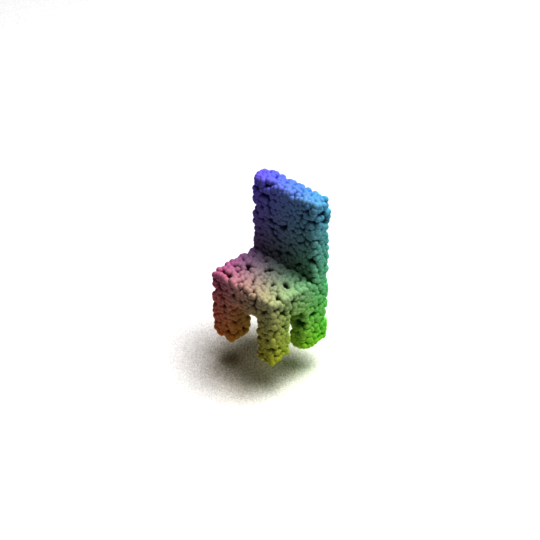

In [20]:
pc = PointCloud.load_partnet(shapenet_uid_to_partnet_uid[shapenet_uid], shapenet_uid)
pc = pc.random_sample(4096 - 1024)
Image.fromarray(render_point_cloud(pc))

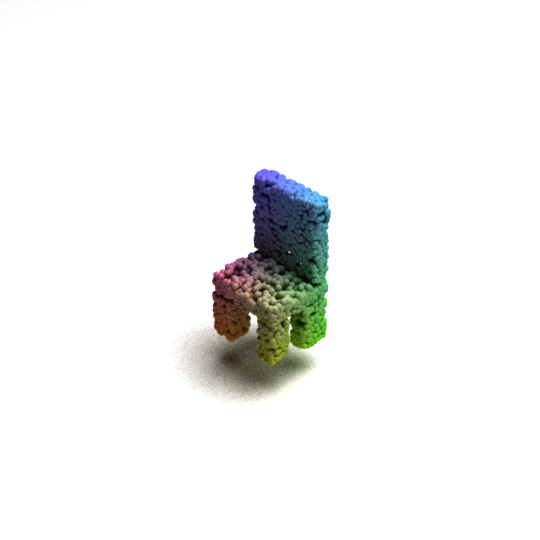

In [21]:
new_pc = pc.shrink("seat", [2])
Image.fromarray(render_point_cloud(new_pc))

In [22]:
sample = df[df.llama3_utterance == "a chair with thin armrests"].iloc[0]
shapenet_uid = sample.source_uid
shapenet_uid = "chair/ShapeNet/11d9817e65d7ead6b87028a4b477349f"
sample.utterance

'It has thin arms'

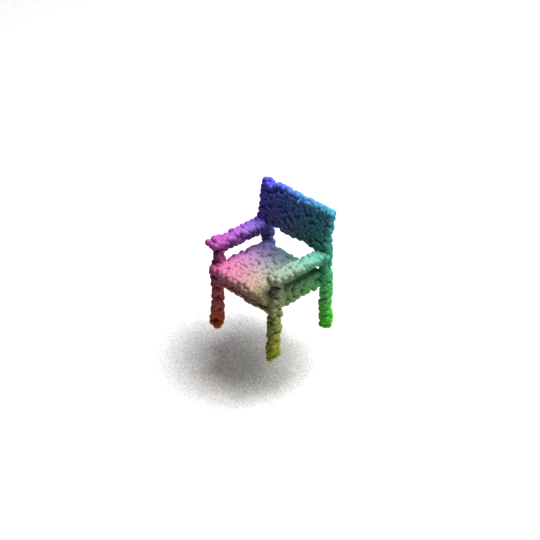

In [23]:
pc = PointCloud.load_partnet(shapenet_uid_to_partnet_uid[shapenet_uid], shapenet_uid)
pc = pc.random_sample(4096 - 1024)
Image.fromarray(render_point_cloud(pc))

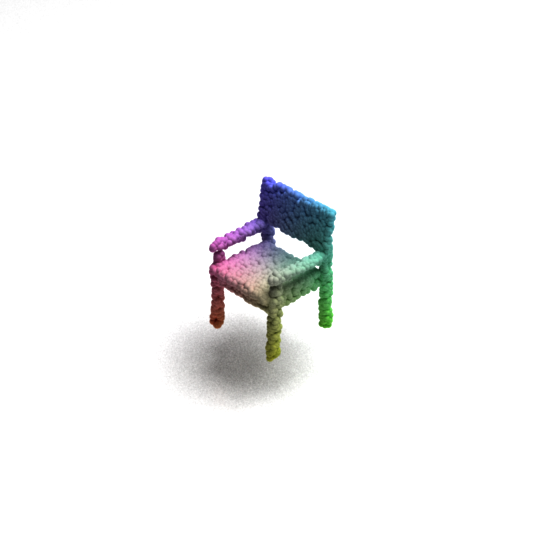

In [24]:
new_pc = pc.shrink("arm", [1, 2])
Image.fromarray(render_point_cloud(new_pc))

In [25]:
sample = df[df.llama3_utterance == "a chair with a thick seat"].iloc[6]
shapenet_uid = sample.source_uid
sample.utterance

'It has a thicker back'

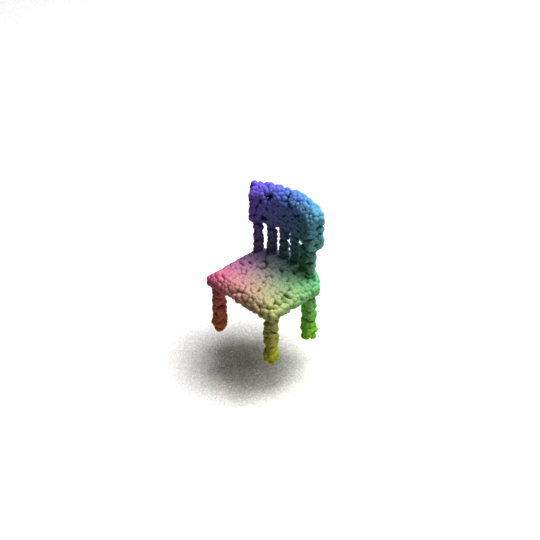

In [26]:
pc = PointCloud.load_partnet(shapenet_uid_to_partnet_uid[shapenet_uid], shapenet_uid)
pc = pc.random_sample(4096 - 1024)
Image.fromarray(render_point_cloud(pc))

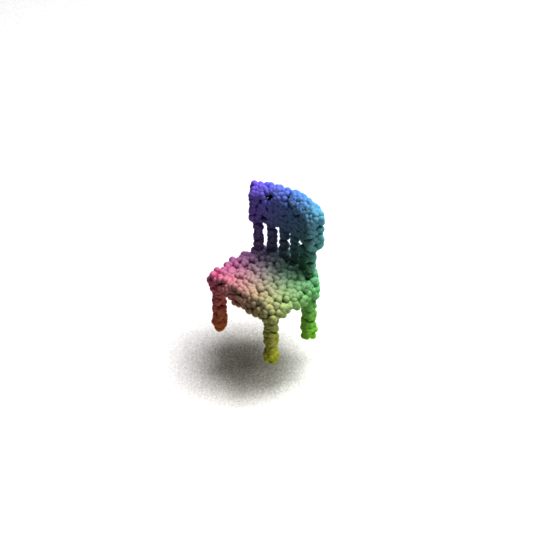

In [27]:
new_pc = pc.expand("seat", [2], 3)
Image.fromarray(render_point_cloud(new_pc))

In [28]:
sample = df[df.llama3_utterance == "a chair with thick armrests"].iloc[0]
shapenet_uid = sample.source_uid
sample.utterance

'the armrests are thick'

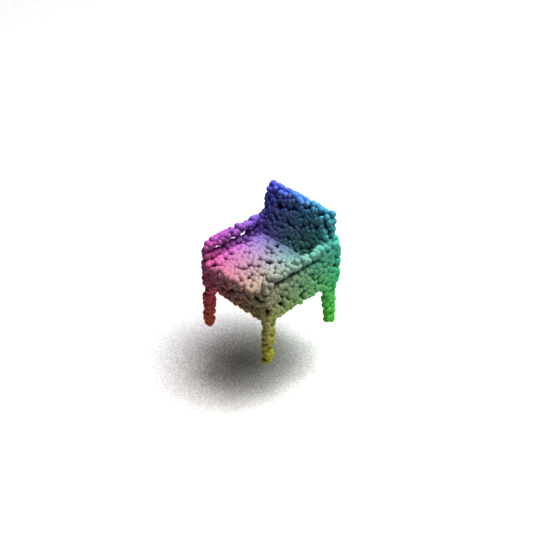

In [29]:
pc = PointCloud.load_partnet(shapenet_uid_to_partnet_uid[shapenet_uid], shapenet_uid)
pc = pc.random_sample(4096 - 1024)
Image.fromarray(render_point_cloud(pc))

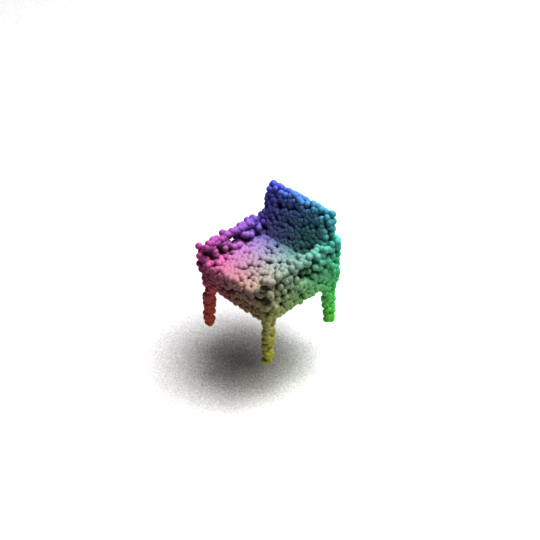

In [30]:
new_pc = pc.expand("arm", [1, 2], 2)
Image.fromarray(render_point_cloud(new_pc))

In [31]:
sample = df[df.llama3_utterance == "a chair with a thin backrest"].iloc[0]
shapenet_uid = sample.source_uid
sample.utterance

'It has a thin backrest'

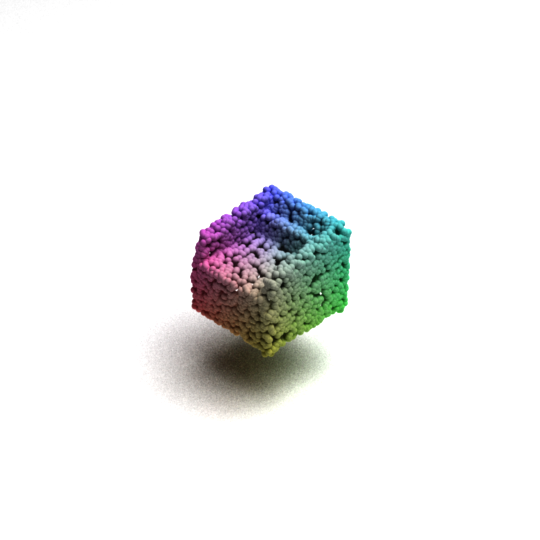

In [32]:
pc = PointCloud.load_partnet(shapenet_uid_to_partnet_uid[shapenet_uid], shapenet_uid)
pc = pc.random_sample(4096 - 1024)
Image.fromarray(render_point_cloud(pc))

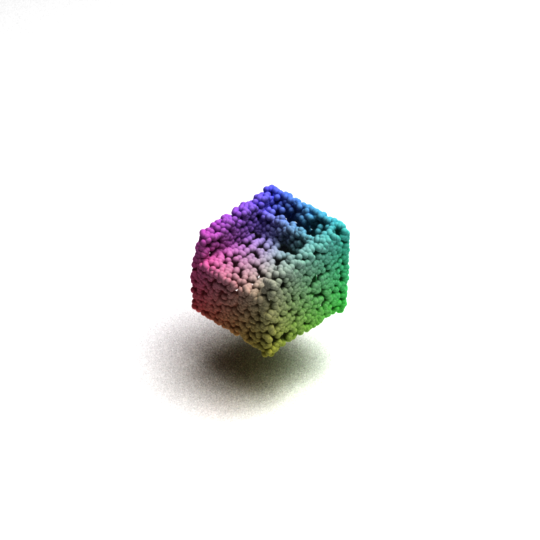

In [33]:
new_pc = pc.shrink("back", [0])
Image.fromarray(render_point_cloud(new_pc))

In [34]:
sample = df[df.llama3_utterance == "a chair with a thick backrest"].iloc[2]
shapenet_uid = sample.source_uid
sample.utterance

'The backrest of the chair is thicker'

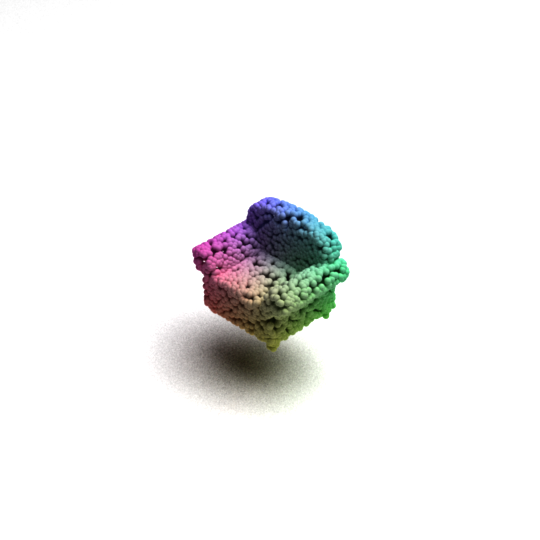

In [35]:
pc = PointCloud.load_partnet(shapenet_uid_to_partnet_uid[shapenet_uid], shapenet_uid)
pc = pc.random_sample(4096 - 1024)
Image.fromarray(render_point_cloud(pc))

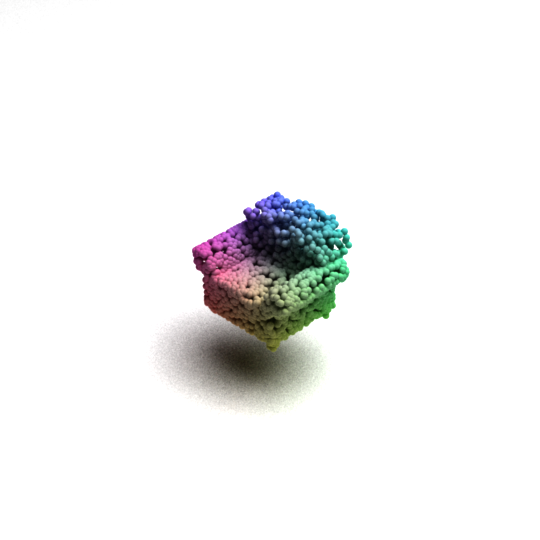

In [36]:
new_pc = pc.expand("back", [0], 3)
Image.fromarray(render_point_cloud(new_pc))

In [37]:
sample = df[df.llama3_utterance == "a chair with a short backrest"].iloc[2]
shapenet_uid = sample.source_uid
sample.utterance

'The target has a shorter backrest'

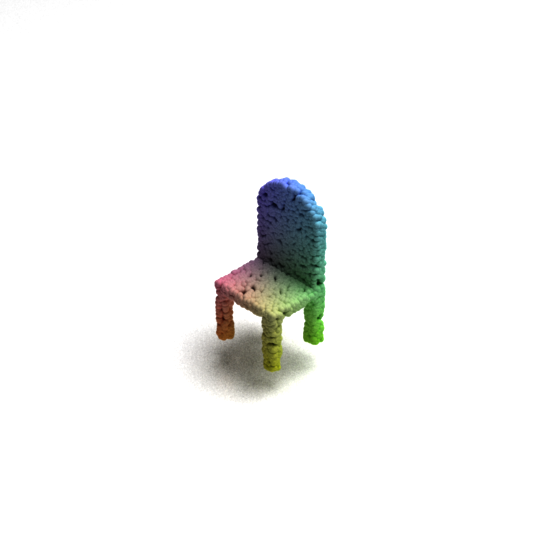

In [38]:
pc = PointCloud.load_partnet(shapenet_uid_to_partnet_uid[shapenet_uid], shapenet_uid)
pc = pc.random_sample(4096 - 1024)
Image.fromarray(render_point_cloud(pc))

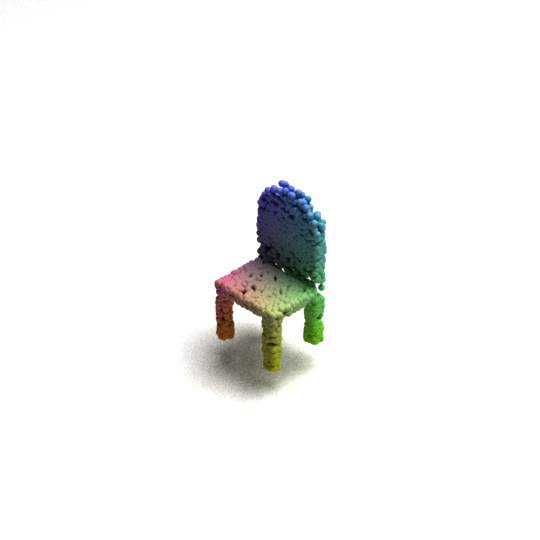

In [39]:
new_pc = pc.shrink("back", [2])
Image.fromarray(render_point_cloud(new_pc))

In [5]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
upsampler_model = model_from_config(MODEL_CONFIGS["upsample"], device)
upsampler_model.eval()
upsampler_diffusion = diffusion_from_config(DIFFUSION_CONFIGS["upsample"])
upsampler_model.load_state_dict(load_checkpoint("upsample", device))

<All keys matched successfully>

In [6]:
sampler = PointCloudSampler(
    device=device,
    models=[upsampler_model],
    diffusions=[upsampler_diffusion],
    num_points=[4096 - 1024],
    aux_channels=["R", "G", "B"],
    guidance_scale=[3.0],
    model_kwargs_key_filter=["texts"],
    use_karras=[True],
    karras_steps=[64],
    sigma_min=[1e-3],
    sigma_max=[160],
    s_churn=[0],
)

In [7]:
utterance_to_part_and_args_and_func = {
    "a chair with long legs": ("leg", {"axes": [2], "high": 4, "clip_max": True}, "expand"),
    "a chair with thin legs": ("leg", {"axes": [0, 1]}, "shrink"),
    "a chair with thick legs": ("leg", {"axes": [0, 1], "high": 2}, "expand"),
    "a chair with a thin seat": ("seat", {"axes": [2]}, "shrink"),
    "a chair with a thick seat": ("seat", {"axes": [2], "high": 3}, "expand"),
    "a chair with thin armrests": ("arm", {"axes": [1, 2]}, "shrink"),
    "a chair with thick armrests": ("arm", {"axes": [1, 2], "high": 2}, "expand"),
    "a chair with a short backrest": ("back", {"axes": [2]}, "shrink"),
    "a chair with a long backrest": ("back", {"axes": [2], "high": 3, "clip_min": True}, "expand"),
    "a chair with a thin backrest": ("back", {"axes": [0]}, "shrink"),
    "a chair with a thick backrest": ("back", {"axes": [0], "high": 3}, "expand"),
}

In [8]:
t = 0
images_dir = "html/images"
os.makedirs(images_dir, exist_ok=True)
html = "<table style='font-size:36px;'>\n"
html += "<tr><th>Prompt</th><th>Condition</th><th>Noised</th><th>Downsampled</th><th>Upsampled</th></tr>\n"
for utterance, (part, args, func) in tqdm(utterance_to_part_and_args_and_func.items()):
    curr_df = df[df.llama3_utterance == utterance]
    for _, row in df[df.llama3_utterance == utterance].sample(min(5, len(curr_df))).iterrows():
        if os.path.exists(f"{images_dir}/{t}_upsampled.png"):
            print(f"Skipping {t}")
            t += 1
            continue
        shapenet_uid = row.source_uid
        pc = PointCloud.load_partnet(shapenet_uid_to_partnet_uid[shapenet_uid], shapenet_uid)
        pc = pc.random_sample(4096 - 1024)
        Image.fromarray(render_point_cloud(pc)).save(f"{images_dir}/{t}_condition.png")
        if func == "expand":
            noised_pc = pc.expand(part, **args)
        elif func == "shrink":
            noised_pc = pc.shrink(part, **args)
        else:
            raise ValueError(f"Unknown function {func}")
        Image.fromarray(render_point_cloud(noised_pc)).save(f"{images_dir}/{t}_noised.png")
        downsampled_pc = noised_pc.random_sample(1024)
        Image.fromarray(render_point_cloud(downsampled_pc)).save(f"{images_dir}/{t}_downsampled.png")
        samples = None
        for x in tqdm(sampler.sample_batch_progressive(batch_size=1, model_kwargs=dict(texts=[row.llama3_wnlemma_utterance]), prev_samples=downsampled_pc.encode().unsqueeze(0).to(device))):
            samples = x
        upsampled_pc = sampler.output_to_point_clouds(samples)[0]
        Image.fromarray(render_point_cloud(upsampled_pc)).save(f"{images_dir}/{t}_upsampled.png")
        html += f"<tr><td>{row.utterance}</td><td><img src='images/{t}_condition.png'></td><td><img src='images/{t}_noised.png'></td><td><img src='images/{t}_downsampled.png'></td><td><img src='images/{t}_upsampled.png'></td></tr>\n"
        t += 1
html += "</table>"
with open("html/index.html", "w") as f:
    f.write(html)


  0%|          | 0/11 [00:00<?, ?it/s]

0it [00:00, ?it/s]

KeyboardInterrupt: 